# Exploratory Data Analysis Notebook

## Project Description

## Package Importing

In [16]:
import pandas as pd
import matplotlib.pyplot as  plt
import sklearn
import pandas_profiling
import seaborn as sns
import popmon
from sklearn.model_selection import KFold
import time
import sys
import datetime
from sklearn import metrics

## Data Importing

In [17]:
folder_path = '../data/raw'
train_data = pd.read_csv(f'{folder_path}/train.csv')
test_data = pd.read_csv(f'{folder_path}/test.csv')
sample = pd.read_csv(f'{folder_path}/sample_submission.csv')

## Dataset Summaries and Heads

In [18]:
print("Number of rows in train data:    \t",train_data.shape[0])
print("Number of columns in train data: \t",train_data.shape[1])
print("\nNumber of rows in test data:     \t",test_data.shape[0])
print("Number of columns in test data:  \t",test_data.shape[1])
print("\nNumber of rows in sample data:   \t",sample.shape[0])
print("Number of column in sample data: \t",sample.shape[1])

Number of rows in train data:    	 900000
Number of columns in train data: 	 33

Number of rows in test data:     	 700000
Number of columns in test data:  	 32

Number of rows in sample data:   	 700000
Number of column in sample data: 	 2


In [4]:
train_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [19]:
test_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [20]:
sample.head()

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


In [21]:
# checking missing data
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data

,Total,Percent
id,0,0.0
f_16,0,0.0
f_30,0,0.0
f_29,0,0.0
f_28,0,0.0
f_27,0,0.0
f_26,0,0.0
f_25,0,0.0
f_24,0,0.0
f_23,0,0.0


<AxesSubplot:xlabel='target', ylabel='count'>

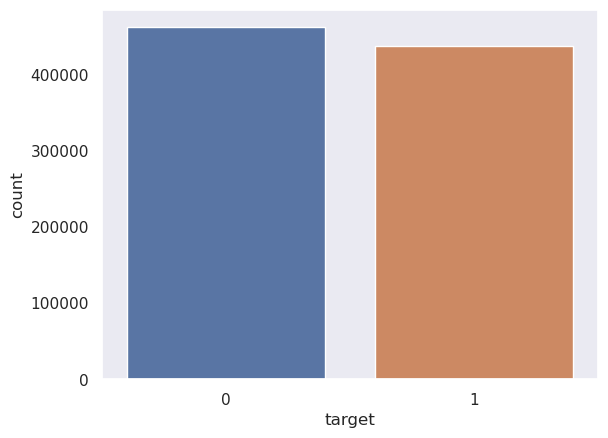

In [34]:
# checking target variable percentage
sns.countplot(x="target", data=train_data)
#sns.countplot(x="target", data=test_data)
#sns.countplot(x="target", data=sample)

## Data Profiling

In [37]:
# drop id column
train_sample.drop('id',axis = 1, inplace=True)

# drop index or else that will also be profiled
train_sample.reset_index(drop=True, inplace=True)

# sample data if required if reports too big
train_sample = train_data.sample(10000)

In [ ]:
# create minimal report in reports
train_data.profile_report(title="Minimal Report",minimal=True).to_file("../reports/pp_eda_minimal.html")

In [38]:
# set of parameters to create customer report
train_sample.profile_report(
    title="Custom Report",
    # create missing/null value diagrams
    # disable if no missing values
    missing_diagrams={
        "heatmap": False,
        "dendrogram": False,
        "bar": False,
        "matrix":False
    # create all correlation plots
    # the correlations and interactions come together
    # the correlations section dictates which corrs will be run
    # the interactions dicatates which variables
    },correlations={
        # strength and directional
        # continuous vars, linear, sensitive to outliers, normal dist
        "pearson": {"calculate": True},
        # strength and directional
        # categorical or quant, linear, no outliers
        "spearman": {"calculate": False},
        # 0-1
        # dependence of 2 vars.
        "kendall": {"calculate": True},
        # no direction, categorical, ordinal, interval
        # non-linear dependency
        # computationally expensive
        "phi_k": {"calculate": False}, # this one is one of the most intensive ones
        # compares 2 categorical vars
        # based on chi-squared test stat
        # sensitive to outlies
        "cramers": {"calculate": True}
    },interactions = {
        # this generates 2d scatter
        "continuous": True
        # comment continouous out and put in 
        # target var to see scatter between
        # only these values and all other
        # values
        #"targets": ['target']
    },html = {
        "style": {"theme":"flatly"}
    }
    
    
).to_file("../reports/pp_eda_custom.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

## Clean Data Re-Profiling and Validation